<a href="https://colab.research.google.com/github/mishasundri/Projects/blob/main/Voter_Registration_in_the_United_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Loading the pandas, matplotib, seaborn, and geopandas libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
# Loading in the dataframe
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

**The purpose of my project** is to analyze voter registration data in the United States to identify key trends at both the national and state levels. By examining voter registration patterns over time, I aim to understand how different factors such as election years, policy changes, and demographic shifts impact voter engagement.

**The goal of this project** is to provide insight that can help policymakers, election officials, and researchers understand voter registration trends and make informed decisions to improve voter participation.

Understanding voter registration trends is crucial for strengthening democracy. This notebook will help identify national patterns in voter registration including spikes before major elections, state-specific trends that may indicate the impact of local policies or events, as well as opportunities to improve voter outreach and engagement.

<br>

**Research Question 1:** How do voter registration numbers fluctuate in the months leading up to a presidential election compared to midterm election years?

**Research Question 2:** How does voter registration in Georgia compare in presidential election years versus midterm election years, and what might explain the differences?


<br>


In [4]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


The variable names are:

***Jurisdiction:*** which refers to the state,

***Year:*** which refers to the year,

***Month:*** which refers to the month,

***New registered voters:*** which refers to the number of registered voters in each state


<br>


In [5]:
# Check for missing data
voters.isnull().values.any()

False


<br>


In [6]:
# Check datatypes in dataframe
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64



<br>


In [7]:
# Rename columns
voters.rename(columns={"Jurisdiction":"NAME", "New registered voters":"registered_voters"}, inplace = True)
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')


<br>


While this dataset provides valuable insights into voter registration trends, these limitations should be considered when interpreting the results:

**1)** Some states may not report voter registration numbers consistently or may have gaps in their data for certain years or months.

**2)** States have different voter registration policies and reporting standards.

**3)** The dataset focuses on total voter registration numbers without breaking them down by age, race, or party affiliation.

**4)** Registering to vote does not necessarily mean someone will vote. This dataset does not provide information on voter turnout.


<br>


In [8]:
# Finding the highest amount of new voter registration
max_voter = voters.sort_values(by="registered_voters", ascending=False).iloc[0]

state = max_voter["NAME"]
month = max_voter["Month"]
year = max_voter["Year"]
new_registered_voters = max_voter["registered_voters"]

print(f"State: {state}")
print(f"Month: {month}")
print(f"Year: {year}")
print(f"New Registered Voters: {new_registered_voters}")

State: California
Month: Feb
Year: 2020
New Registered Voters: 238281



<br>


In [9]:
# Finding average registered voters
average_reg_voters = voters["registered_voters"].mean()
average_reg_voters

48223.46226415094

**Average Registered Voters** is about 48,224 people.


<br>


In [10]:
# Creating a dataframe and showing only the times where voter registration was higher than the average
high_voters = voters[voters["registered_voters"] > average_reg_voters]
print(high_voters)
high_voters.count()

              NAME  Year Month  registered_voters
1          Arizona  2016   Feb              51155
2          Arizona  2016   Mar              48614
5          Arizona  2020   Feb              50853
8       California  2016   Jan              87574
9       California  2016   Feb             103377
10      California  2016   Mar             174278
11      California  2016   Apr             185478
12      California  2020   Jan             151595
13      California  2020   Feb             238281
14      California  2020   Mar             176810
42         Florida  2016   Jan              50231
43         Florida  2016   Feb              87351
44         Florida  2016   Mar              73627
45         Florida  2016   Apr              52508
46         Florida  2020   Jan              77466
47         Florida  2020   Feb             109859
48         Florida  2020   Mar              54872
55         Georgia  2020   Feb              55386
59        Illinois  2016   Feb              99674


,0
NAME,36
Year,36
Month,36
registered_voters,36


**Voter registration** was higher than the average 36 times.


<br>


In [11]:
# How many times each state went above the national average for new voter registration
voters["above_average"] = voters["registered_voters"] > average_reg_voters
state_above_average = voters.groupby("NAME")["above_average"].sum()
print(state_above_average)

NAME
Arizona                 3
California              7
Colorado                0
Delaware                0
District of Columbia    0
Florida                 7
Georgia                 1
Illinois                4
Maryland                0
North Carolina          6
Texas                   8
Virginia                0
Name: above_average, dtype: int64



<br>


In [12]:
# Top 3 states had the highest average voter registration overall
state_highest_average = voters.groupby("NAME")["registered_voters"].mean()
sorted_voters = state_highest_average.sort_values(ascending=False)
top_3 = sorted_voters.head(3)
top_3

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125



<br>


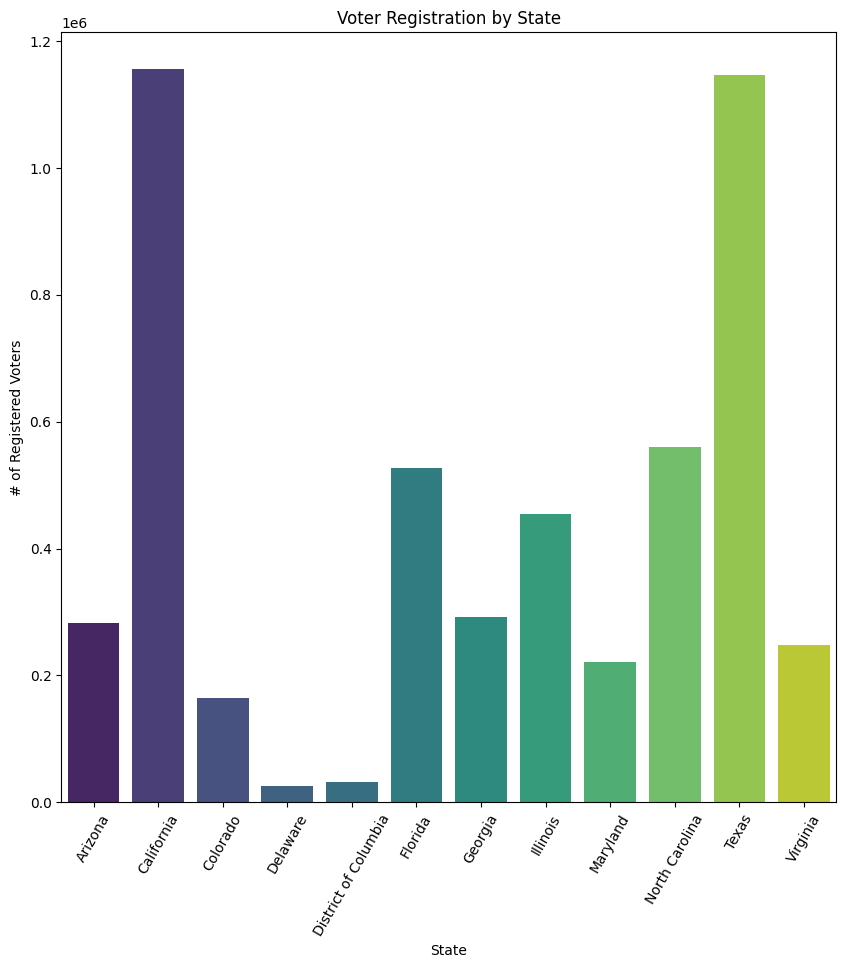

In [13]:
# Total voters registered per state
total_voters_by_state = voters.groupby("NAME")["registered_voters"].sum().reset_index()
plt.figure(figsize = (10,10))
sns.barplot(total_voters_by_state, x="NAME", y="registered_voters", hue = "NAME", palette="viridis")
plt.title("Voter Registration by State")
plt.xlabel("State")
plt.ylabel("# of Registered Voters")
plt.xticks(rotation = 60)
plt.show()

One of the trends this data shows is that the larger states, Texas and California have more registered voters than some of the smaller states like, Delaware and the District of Columbia.


<br>


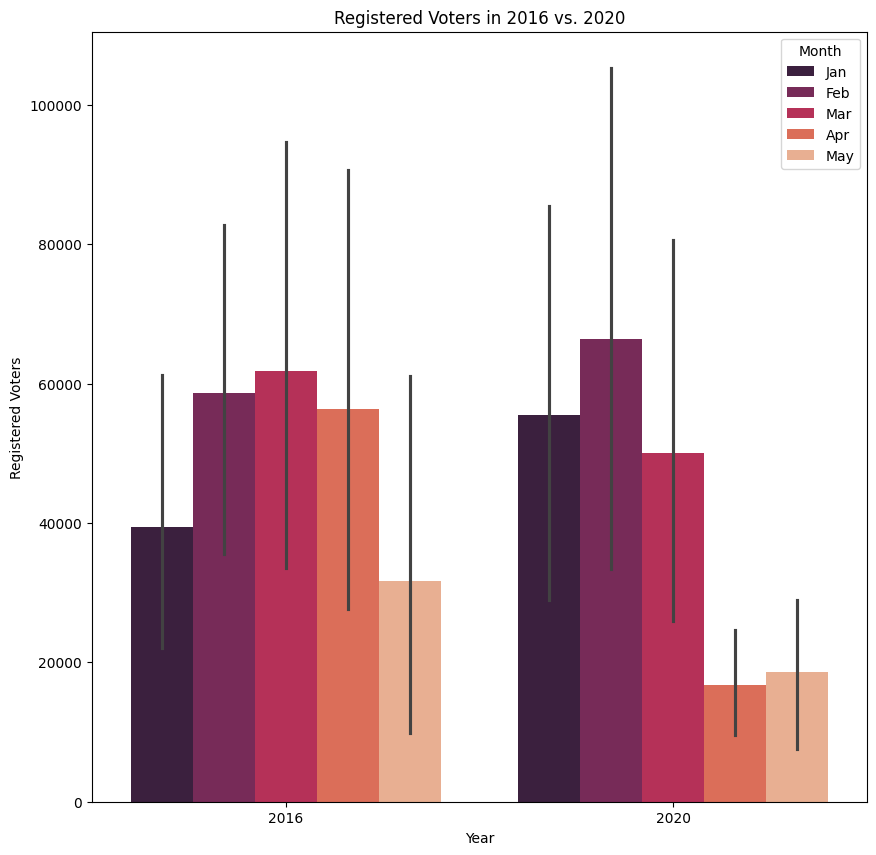

In [14]:
# Plot comparing voter registation in 2016 and 2020
voters_2016_2020 = voters.loc[(voters["Year"] == 2016) & (voters["Year"] == 2020)]
plt.figure(figsize = (10,10))
sns.barplot(voters, x = "Year", y = "registered_voters", hue = "Month", palette = "rocket")
plt.title("Registered Voters in 2016 vs. 2020")
plt.xlabel("Year")
plt.ylabel("Registered Voters")
plt.show()

A trend this data shows is a decrease spike of registered voters in April and May in 2020, after a high spike in earlier months compared to 2016.  


<br>


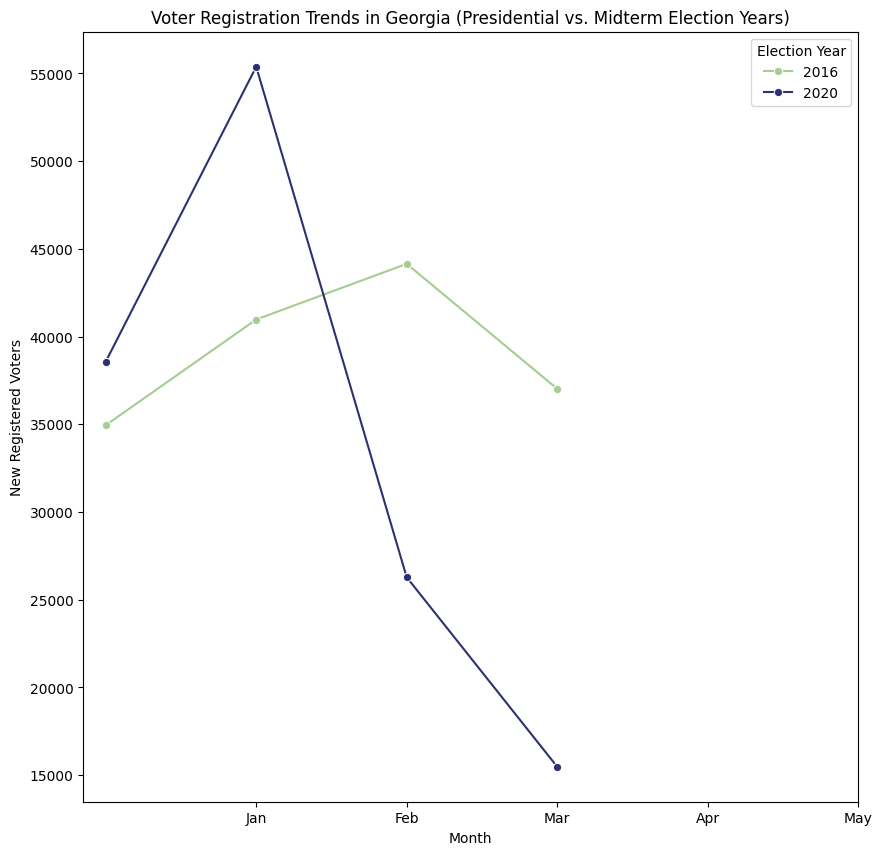

In [15]:
# Voter registration in Georgia comparing in presidential election years versus midterm election years
georgia_data = voters[voters["NAME"] == "Georgia"]
georgia_elections = georgia_data[georgia_data["Year"].isin([2016, 2018, 2020])]

plt.figure(figsize=(10, 10))
sns.lineplot(data=georgia_elections, x="Month", y="registered_voters", hue="Year", marker="o", palette="crest")
plt.xlabel("Month")
plt.ylabel("New Registered Voters")
plt.title("Voter Registration Trends in Georgia (Presidential vs. Midterm Election Years)")
plt.xticks(ticks=range(1, 6), labels=["Jan", "Feb", "Mar", "Apr", "May"])
plt.legend(title="Election Year")
plt.show()

In [16]:
# Loading in shape file data
!git clone https://github.com/SFord87/325-Datasets
shapefile = ("/content/325-Datasets/cb_2018_us_state_500k.shp")
states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 12.09 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [17]:
# Setting continental US bounding box
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

In [18]:
# Creating a dataframe that shows the average voter registration per state
average_voter_per_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()
average_voter_per_state

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


In [19]:
# Merging the above dataframe results with the mapping data
average_voter_per_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()
merged = states.merge(average_voter_per_state, on="NAME", how="inner")
merged.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375



<br>


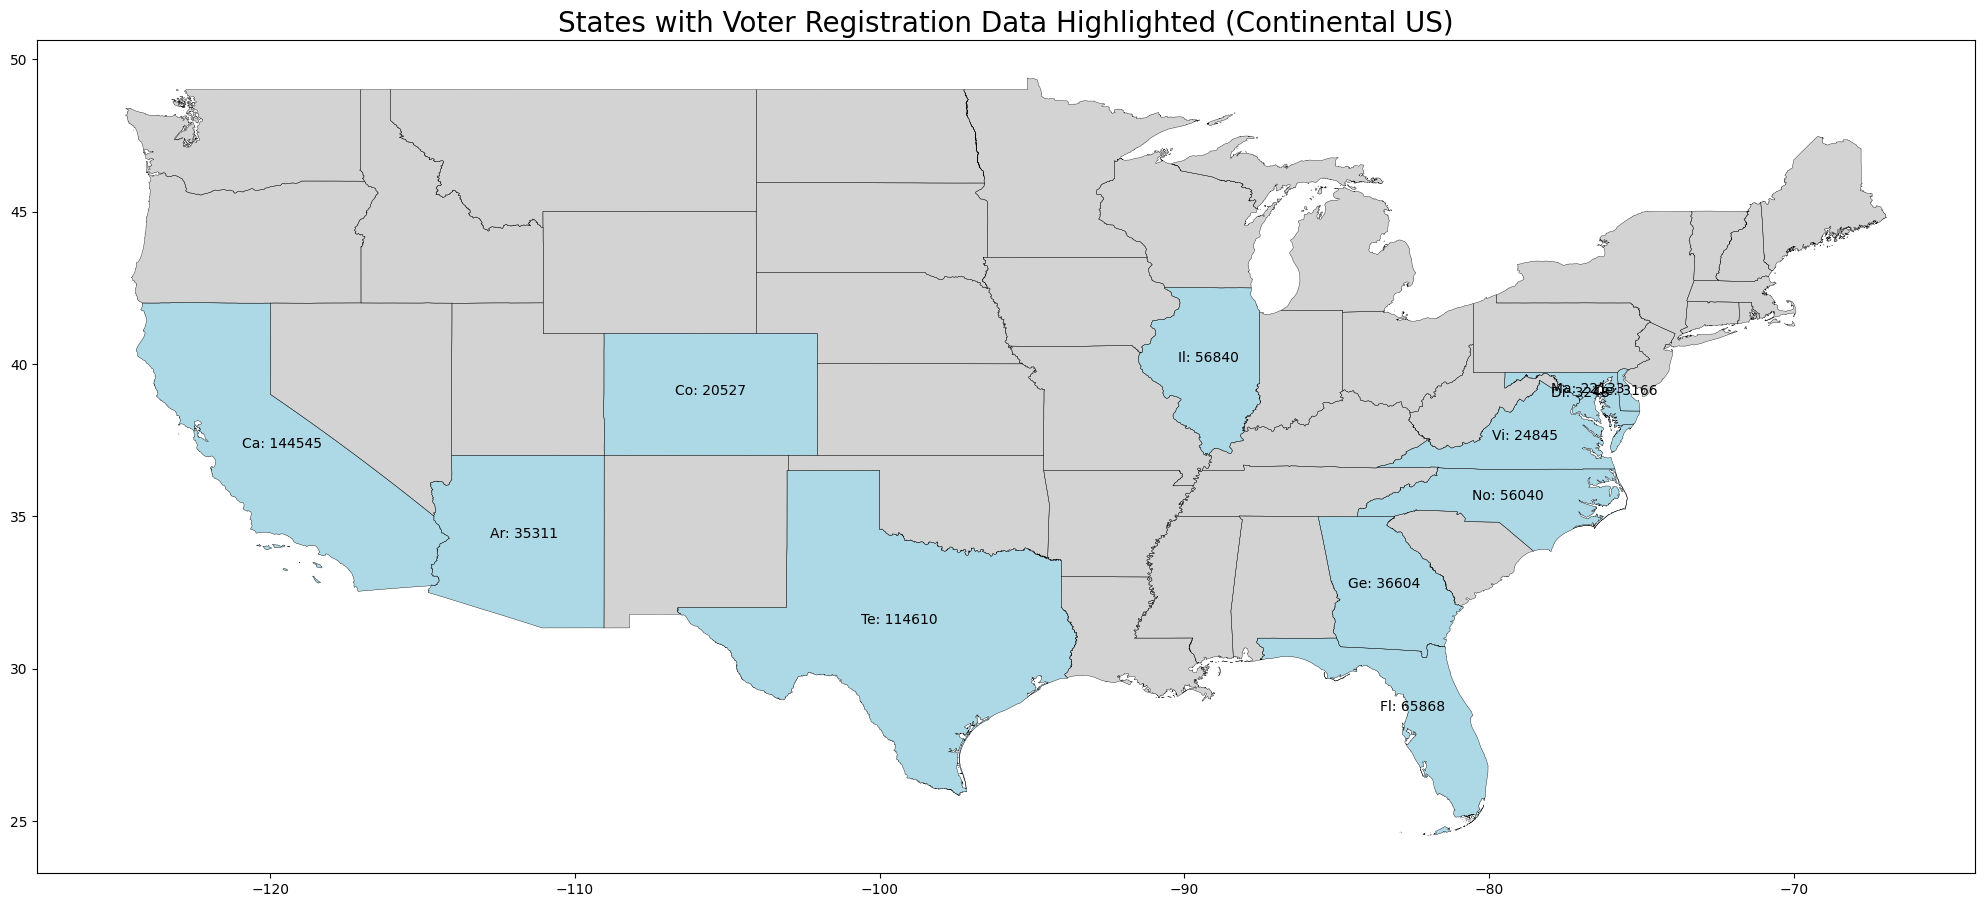

In [20]:
# Creating map of US states with Voter Registration Data Highlighted
ax = bbox.plot(figsize=(25, 15), color='lightgrey')
merged.plot(ax=ax, color='lightblue')
bbox.boundary.plot(ax=ax, linewidth=0.25, color='black')
merged.apply(lambda row: ax.text(row.geometry.centroid.x, row.geometry.centroid.y,
                                f"{row['NAME'][:2]}: {int(row['registered_voters'])}",
                                fontsize=10, ha = "center" , color='black'), axis=1)

plt.title('States with Voter Registration Data Highlighted (Continental US)', fontsize=20)
plt.show()

Through this analysis, I have gained a deeper understanding of voter registration trends across the United States. The visualization of average voter registration data by state highlights regional disparities, with certain states showing significantly higher voter registration figures. Notably, states such as California, Texas, and Florida consistently rank high in terms of registered voters, reflecting their larger populations and higher engagement with the voter registration process.

<br>

Based on the analysis, I suggest that targeted voter registration campaigns be developed for states with historically low registration figures. For example, states in the Midwest and South may benefit from increased outreach efforts to ensure more equitable representation. Incorporating a data-driven approach into such campaigns, focusing on key months or years when voter registration spikes, could help to boost registration numbers ahead of major elections, ultimately fostering greater democratic participation across the country.

<br>

If I were to continue working on this project, the next step would be to analyze the factors contributing to variations in voter registration rates across states. This could involve incorporating additional demographic, socioeconomic, or political data to help explain why certain states perform better in voter registration. Additionally, I would look into how state-level policies, such as automatic voter registration or early voting laws, may influence registration trends.

***Misha Sundri***